# **Unsupvervised Learning Project**

**Objectives Of Project**


1.   Creating Customer Segments
2.   Learn how to develop and end-to-end Clustering and Dimensionality Reduction Project!
3.   Learn how to apply feature scale and outliers detection on this data
4.   Grouping customers in clusters of similar spending characteristics.
5.   Describing the variations within the different clusters, in order to find the best delivery structure for each group.



# **Introduction**
---
- Throughout this project, we are going to analyze the spending behaviours of several customers in some product categories. 

**The main goals of the project are:**

- Grouping customers in clusters of similar spending characteristics.
- Describing the variations within the different clusters, in order to find the best delivery structure for each group.
- To carry out this project we will use the dataset that can be found in the following UCI Machine Learning Repository :

https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

# 1) Data set description
---
This data set contain 8 columns(attributes) and 441 rows(values). Detail of theses columns are below : 
- **FRESH**: annual spending (m.u.) on fresh products (Continuous);
- **MILK**: annual spending (m.u.) on milk products (Continuous);
- **GROCERY**: annual spending (m.u.)on grocery products (Continuous);
- **FROZEN**: annual spending (m.u.)on frozen products (Continuous)
- **DETERGENTS_PAPER**: annual spending (m.u.) on detergents and paper products (Continuous)
- **DELICATESSEN**: annual spending (m.u.)on and delicatessen products (Continuous);
- **CHANNEL**: customer Channel - Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal)
- **REGION**: customer Region  

# 2) Background theory :
--- 
- Feature sacling
- Outlier detection
- Unsupervised learning
- wholesale business
- Feature selection in unsupervised learning
---
**References** :

https://medium.com/@sa2253/wholesale-customers-dataset-65c58c692c6a

https://towardsdatascience.com/unsupervised-learning-project-creating-customer-segments-17c4b4bbf925 

https://www.kaggle.com/samratp/creating-customer-segments-unsupervised-learning

# 3) Data Exploration


### **Getting started **
---
- In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in monetary units) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.
- For the purposes of this project, the features 'Channel' and 'Region' will be excluded in the analysis — with focus instead on the six product categories recorded for customers. (Grouping customers in clusters of similar spending characteristics.)

## 3.1) Import library

In [1]:
import pandas as pd
#import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn import metrics

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 3.2) Load data

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
wholesale_data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Wholesale_customers_data.csv')
wholesale_data.drop(['Region', 'Channel'], axis = 1, inplace = True)
wholesale_data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


## 3.3) Observe data

### Print data info

In [4]:
wholesale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


### Show 5 first rows

In [5]:
wholesale_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


### Show 5 last rows

In [6]:
wholesale_data.tail()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125
439,2787,1698,2510,65,477,52


### Print data from 100 to 120

In [7]:
wholesale_data[100:120]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
100,11594,7779,12144,3252,8035,3029
101,1420,10810,16267,1593,6766,1838
102,2932,6459,7677,2561,4573,1386
103,56082,3504,8906,18028,1480,2498
104,14100,2132,3445,1336,1491,548
105,15587,1014,3970,910,139,1378
106,1454,6337,10704,133,6830,1831
107,8797,10646,14886,2471,8969,1438
108,1531,8397,6981,247,2505,1236
109,1406,16729,28986,673,836,3


### Print attributes information

In [8]:
print("Attributes in whole sale data : \n", wholesale_data.columns.values)

Attributes in whole sale data : 
 ['Fresh' 'Milk' 'Grocery' 'Frozen' 'Detergents_Paper' 'Delicassen']


### Finding missing values

In [9]:
print("Columns which have missing values:\n", wholesale_data.isnull().count())

Columns which have missing values:
 Fresh               440
Milk                440
Grocery             440
Frozen              440
Detergents_Paper    440
Delicassen          440
dtype: int64


In [10]:
print('Counting the missing data:')
print(wholesale_data.isnull().sum())

Counting the missing data:
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


### Print attributes data type

In [11]:
print("Attributes data type : \n", wholesale_data.dtypes)

Attributes data type : 
 Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object


### Print shape, size and dim of data

In [12]:
print("Shape of the data : ", wholesale_data.shape)
print("Size of the data : ", wholesale_data.size)
print("Dimensional of the data : ", wholesale_data.ndim)

Shape of the data :  (440, 6)
Size of the data :  2640
Dimensional of the data :  2


### Statistic data with attribute which is **Number** type


In [13]:
wholesale_data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation : Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail.


In [14]:
# Select three indices of your choice you wish to sample from the dataset
indices = [85,181,338]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(wholesale_data.loc[indices], columns = wholesale_data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,16117,46197,92780,1026,40827,2944
1,112151,29627,18148,16745,4948,8550
2,3,333,7021,15601,15,550


### Feature relevance
---
One interesting thought to consider is if one (or more) of the 6 product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

def predict_one_feature(dropped_feature):
    # Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    print("Dropping feature -> {}".format(dropped_feature))
    new_data = wholesale_data.drop([dropped_feature], axis = 1)
    
    # Split the data into training and testing sets(0.25) using the given feature as the target
    # Set a random state.
    X_train, X_test, y_train, y_test = train_test_split(new_data, wholesale_data[dropped_feature], test_size=0.25, random_state=0)
    
    # Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=0)
    regressor.fit(X_train, y_train)
    
    # Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    print("Score for predicting '{}' using other features = {:.3f}\n".format(dropped_feature, score))

print("Features in data -> {}\n".format(wholesale_data.columns.values))

for cols in wholesale_data.columns.values:
    predict_one_feature(cols)

Features in data -> ['Fresh' 'Milk' 'Grocery' 'Frozen' 'Detergents_Paper' 'Delicassen']

Dropping feature -> Fresh
Score for predicting 'Fresh' using other features = -0.252

Dropping feature -> Milk
Score for predicting 'Milk' using other features = 0.366

Dropping feature -> Grocery
Score for predicting 'Grocery' using other features = 0.603

Dropping feature -> Frozen
Score for predicting 'Frozen' using other features = 0.254

Dropping feature -> Detergents_Paper
Score for predicting 'Detergents_Paper' using other features = 0.729

Dropping feature -> Delicassen
Score for predicting 'Delicassen' using other features = -11.664



### Comments at this stage
---
Considering the total purchase cost of each product category and the statistical description of the dataset above for our sample customers. We make a prediction on what kind of establishment (customer) could each of the three samples we've chosen represent?

The mean values are as follows:

- Fresh: 12000.2977
- Milk: 5796.2
- Grocery: 3071.9
- Detergents_paper: 2881.4
- Delicatessen: 1524.8

Knowing this, how do our samples compare?

1. **Index 85: Retailer:**

- Largest spending on detergents and paper and groceries of the entire dataset, which usually are products for houses.

- Higher than average spending on milk.

- Lower than average spending on frozen products.


2. **Index 181: Large market**

- High spending on almost every product category.

- Highest spending on fresh products of the entire dataset. Likely to be a large market.

- Low spending on detergents.

3.  **Index 338: Restaurant**

- The amount of every product is significantly lower than the previous two customers considered. 

- The spending on fresh products is the lowest of the entire dataset. 

- The spending on milk and detergent and papers is in the bottom quartile.

- It may be a small and cheap restaurant which needs groceries and frozen food to serve the meals.



## 3.4) Data analysis

### **Visualize Feature Distributions**
---
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. Features relevant to predict the above, won't show a correlation in the scatter matrix and the inverse is also true.

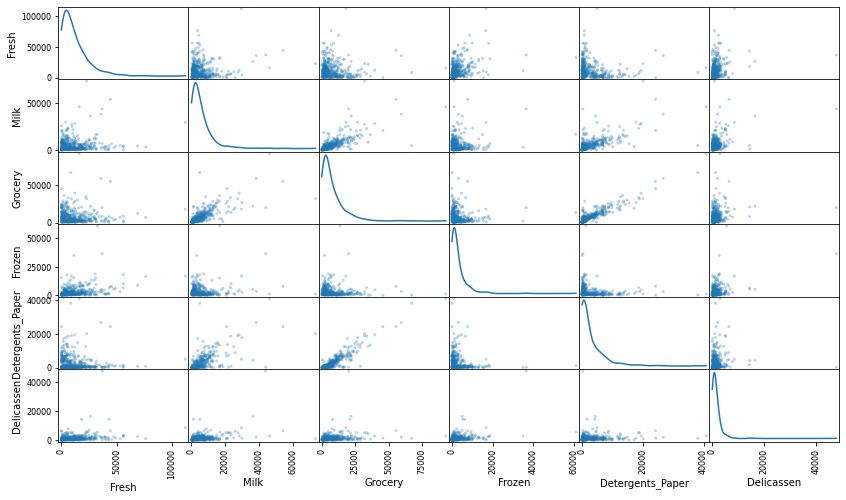

In [16]:
from pandas.plotting import scatter_matrix
# Produce a scatter matrix for each pair of features in the data
scatter_matrix(wholesale_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Using heatmap, view some correlation 

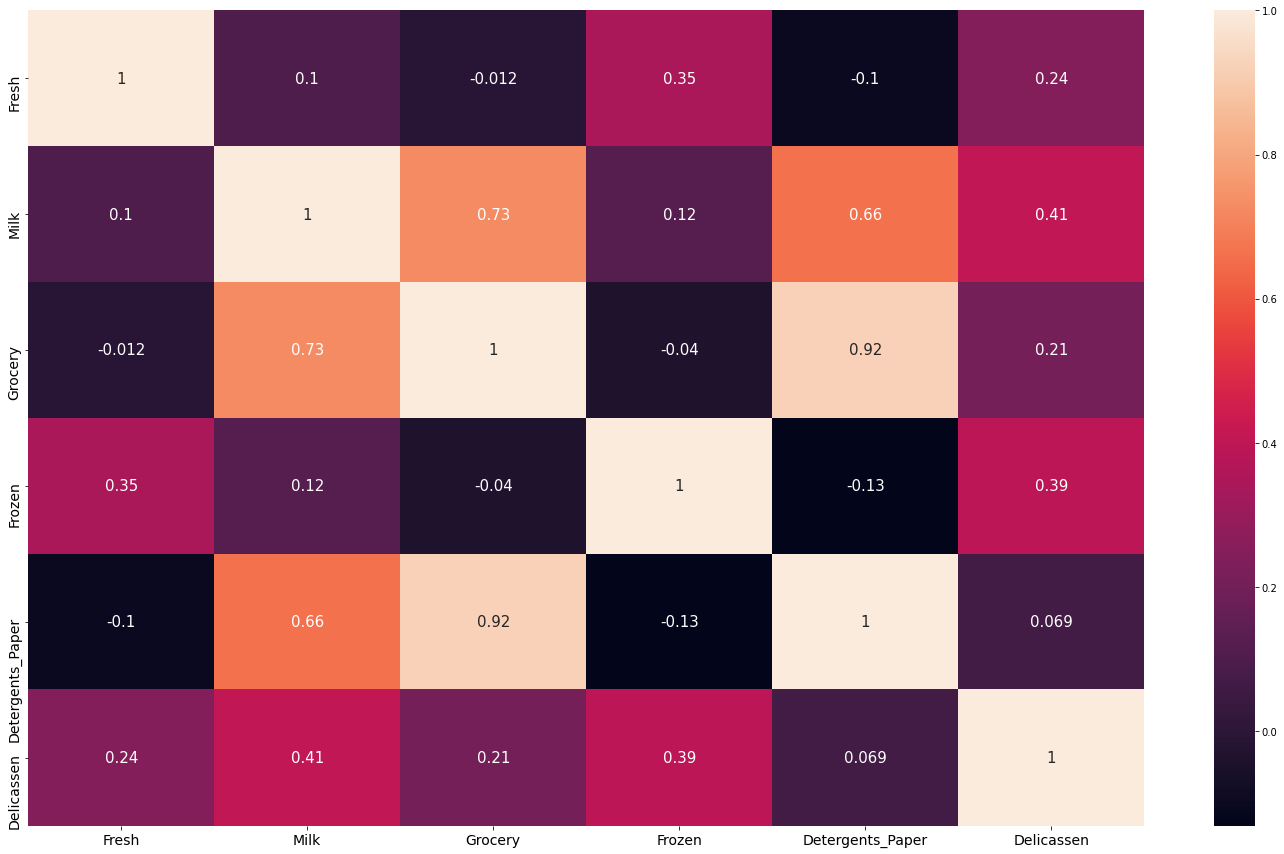

In [17]:
zeromask = np.zeros_like(wholesale_data.corr()) #creates an array of zeros
triangle_indices = np.triu_indices_from(zeromask)
zeromask[triangle_indices] = True

plt.figure(figsize=(25,15))
sns.heatmap(wholesale_data.corr(), annot=True, annot_kws={'size': 15})
sns.set_style('whitegrid')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()


Using the scatter matrix as a reference, we can discuss the following:

- Data is not normally distributed, it is positively skewed and they resemeble the log-normal distribution.

- In most plots, most data points lie near the origin which shows little correlation between them.

- From the scatter plots and the heatmap of correlation, we can see that there is a strong correlation between the 'Grocery' and 'Detergent_paper' features. The features 'Grocery' and 'Milk' also show a good degree of correlation.

- This correlation confirms my guess about the relevance of the 'Grocery' feature, which can be accurately predicted with the 'Detergent_paper' feature. And, therefore, is not an absolutely necessary feature in the dataset.

# 4) Data processing

## 4.1) Feature scaling
---
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most often appropriate to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a Box-Cox test, which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

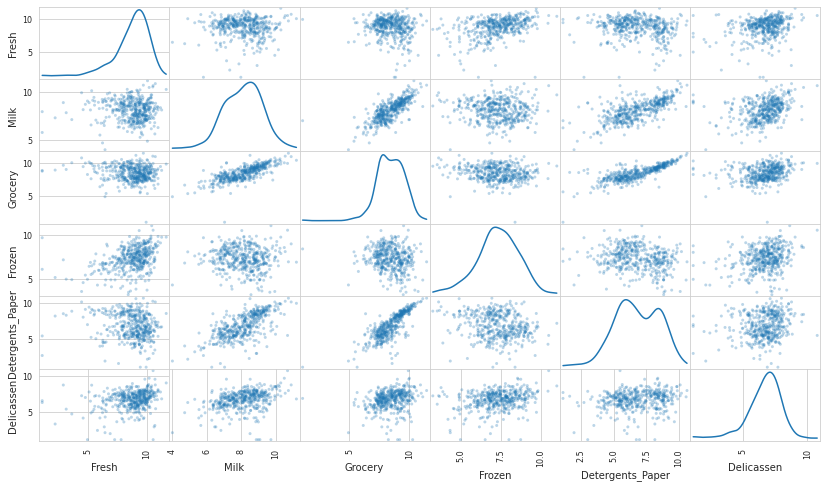

In [18]:
# Weight (Kg) : 58kg
# Height (M) : 178m
#--> Units
#--> Magnitude

# Scale the data using the natural logarithm
log_data = np.log(wholesale_data)

# Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
---
After applying a natural logarithm scaling to the data, the distribution of each feature appear much more normal. For any pairs of features we have identified earlier as being correlated, we observe here that correlation is still present (and whether it is now stronger or weaker than before).

In [19]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.687630,10.740670,11.437986,6.933423,10.617099,7.987524
1,11.627601,10.296441,9.806316,9.725855,8.506739,9.053687
2,1.098612,5.808142,8.856661,9.655090,2.708050,6.309918


## 4.2) Outlier detection
---
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use Tukey's Method for identfying outliers: An outlier step is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In [20]:
outliers = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3-Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    lista = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.tolist()
    outliers.append(lista)
    
# OPTIONAL: Select the indices for data points you wish to remove


# Remove the outliers, if any were specified
#good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicassen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [21]:
print("All outliers values : \n",outliers)

All outliers values : 
 [[65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412], [86, 98, 154, 356], [75, 154], [38, 57, 65, 145, 175, 264, 325, 420, 429, 439], [75, 161], [66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289, 343]]


In [22]:
seen = {}
dupes = []

for lista in outliers:
    for index in lista:
        if index not in seen:
            seen[index] = 1
        else:
            if seen[index] == 1:
                dupes.append(index)
            seen[index] += 1
dupes = sorted(dupes)
dupes

[65, 66, 75, 128, 154]

In [23]:
# Removing outliers

good_data = log_data.drop(dupes, axis=0).reset_index(drop=True)

In [24]:
#Size of data before removing outliers
print(wholesale_data.size)

#Size of data after removing outliers
print(good_data.size)

print("Number of data outliers has been removed : ", wholesale_data.size - good_data.size)

2640
2610
Number of data outliers has been removed :  30


### Observations
---
- Datapoints considered outliers that are present in more than one feature are: 65, 66, 75, 128, 154.

- K-Means is heavily influenced by the presence of outliers as they increase significantly the loss function that the algorithm tries to minimize. This loss function is the squared sum of the distances of each datapoint to the centroid, so, if the outlier is far enough, the centroid will be incorrectly situated. Because of this, the outliers shoul be removed.

## 4.3) Feature Transformation
--- 
In this section we will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA
---
Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the good_data to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the explained variance ratio of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In [25]:
log_samples.shape

(3, 6)

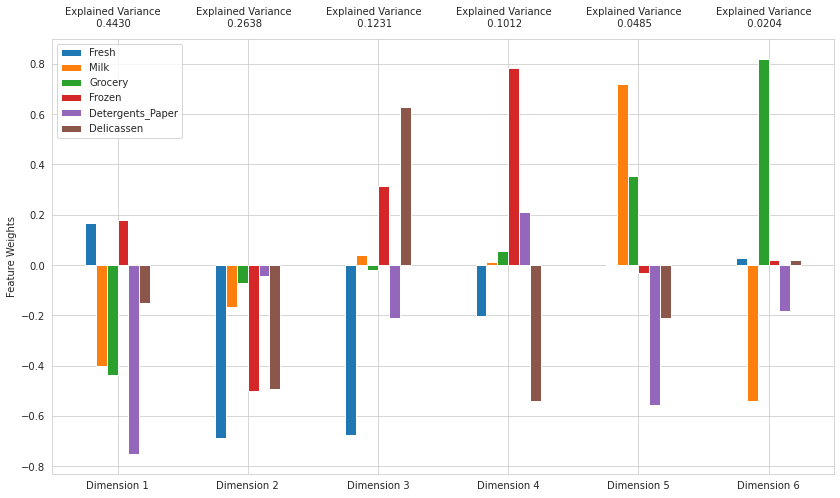

In [26]:
# Import supplementary visualizations code visuals.py
import sys
import os

py_file_location = '/content/gdrive/MyDrive/Colab Notebooks/'
sys.path.append(os.path.abspath(py_file_location))

import visuals as vs

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=good_data.shape[1])
pca = pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Observations
- The variance explained by the first two Principal Components is the 70.68% of the total.

- The variance explained by the first three Principal Components is the 93.11% of the total.

Dimensions discussion:

- Dimension 1: This dimension represents well, in terms of negative variance, the following features: Detergent_Paper, Milk and groceries. Mostly utilities for everyday consuming.

- Dimension 2: This dimension represents well, in terms of negative variance, the following features: Fresh, Frozen and Delicatessen. Mostly food consuming.

- Dimension 3: This dimension represents well, in terms of positive variance, the Delicatessen features, and in terms of negative variance de Fresh feature. Food to be consumed on the day.

- Dimension 4: This dimension represents well, in terms of positive variance, the Frozen feature, and in terms of negative variance, the Delicatessen Feature. Food that can be storaged.

### Observations 2 : 
---
The code below to show how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points.

In [27]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-5.3316,-1.8845,-0.6957,-0.1972,0.5461,0.3802
1,-2.1899,-4.8605,0.0008,0.4827,0.5041,-0.1988
2,3.0206,4.8169,6.4519,2.7403,0.7788,2.1415


## 4.4) Dimensionality Reduction
---
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the cumulative explained variance ratio is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In [28]:
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
---
The cell below show how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [29]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-5.3316,-1.8845
1,-2.1899,-4.8605
2,3.0206,4.8169


## Visualizing a Biplot
---
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case Dimension 1 and Dimension 2). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

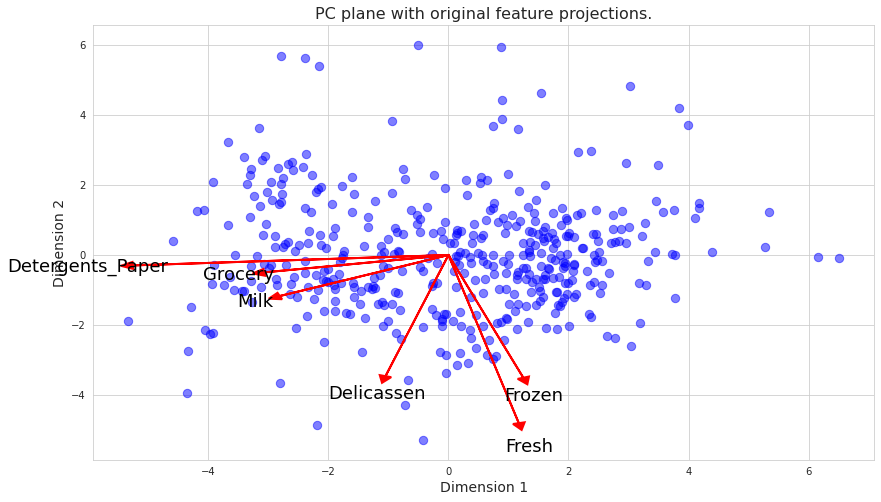

In [30]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation
---
Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on 'Milk', 'Grocery' and 'Detergents_Paper', but not so much on the other product categories.

# 5) Clustering

In [31]:
print(reduced_data)

     Dimension 1  Dimension 2
0      -1.757983     0.009711
1      -1.788665    -0.812251
2      -1.883353    -1.599135
3       1.155265    -1.405201
4      -0.784786    -2.394294
..           ...          ...
430     0.644850    -2.858285
431     3.184831    -1.944772
432    -3.742535    -0.856146
433     1.669147    -0.397968
434     0.739011     3.691448

[435 rows x 2 columns]


## 5.1) Kmeans clustering
---
Depending on the problem, the number of clusters that you expect to be in the *data* may already be known. When the number of clusters is not known a priori, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's silhouette coefficient. The silhouette coefficient for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the mean silhouette coefficient provides for a simple scoring method of a given clustering.

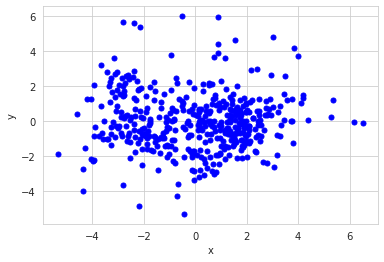

In [32]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.spatial.distance import cdist 

n_samples = 434
n_cluster = 3
arr = reduced_data.to_numpy()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(arr[:, 0], arr[:, 1], 'bo', markersize=5)
plt.plot()
plt.show()

[[-1.12863952  0.26286305]
 [ 1.38566086  0.65383275]
 [ 1.28897109 -1.44423515]]


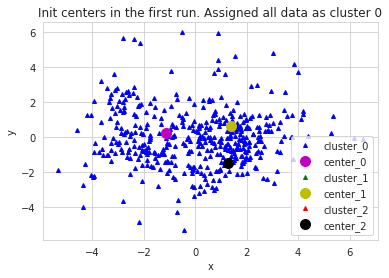

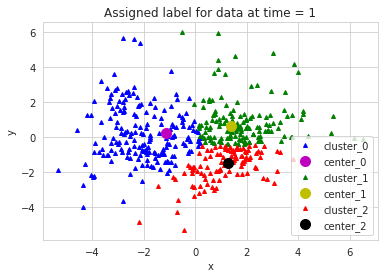

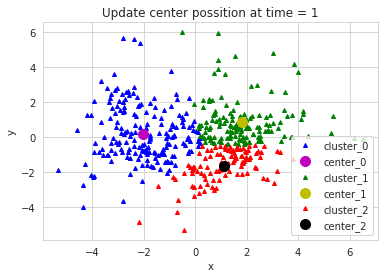

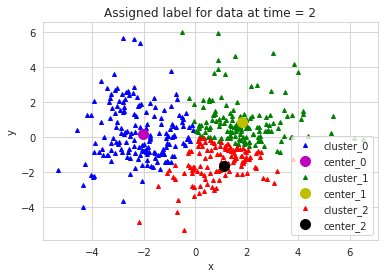

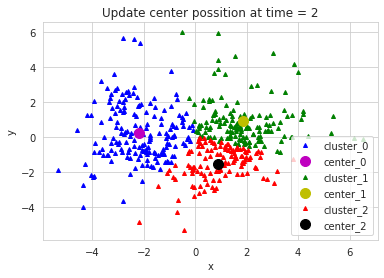

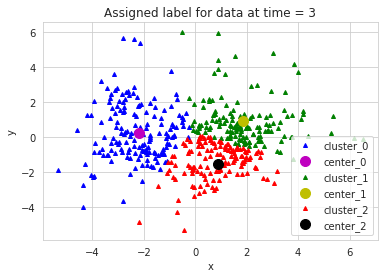

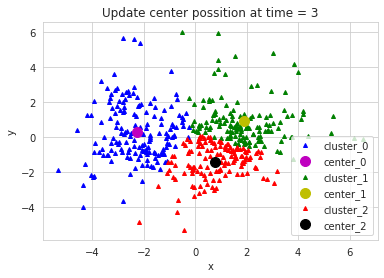

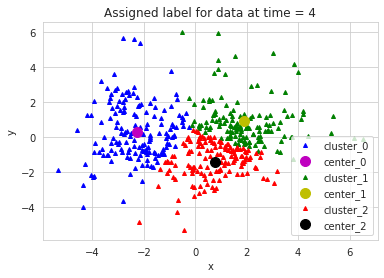

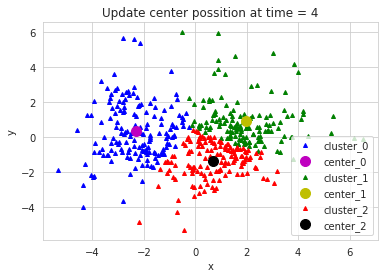

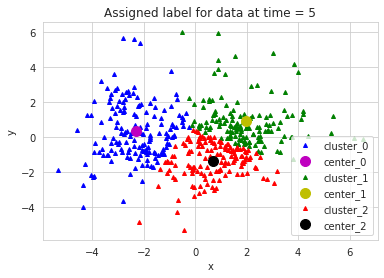

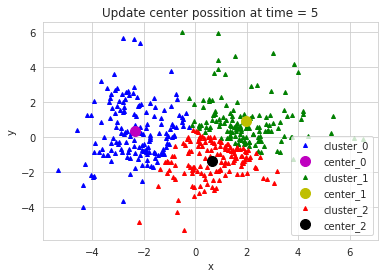

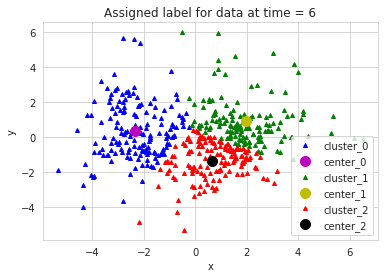

Done! Kmeans has converged after 5 times


In [33]:
def kmeans_init_centers(X, n_cluster):
  # random k index beetween 0 and shape(X) without duplicate index.
  # Then return X[index] as cluster
  return X[np.random.choice(X.shape[0], n_cluster, replace=False)]

def kmeans_predict_labels(X, centers):
  D = cdist(X, centers)
  # return index of the closest center
  return np.argmin(D, axis = 1)

def kmeans_update_centers(X, labels, n_cluster):
  centers = np.zeros((n_cluster, X.shape[1]))
  for k in range(n_cluster):
    # collect all points assigned to the k-th cluster 
    Xk = X[labels == k, :]
    # take average
    centers[k,:] = np.mean(Xk, axis = 0)
  return centers

def kmeans_has_converged(centers, new_centers):
  # return True if two sets of centers are the same
  return (set([tuple(a) for a in centers]) == 
      set([tuple(a) for a in new_centers]))

def kmeans_visualize(X, centers, labels, n_cluster, title):
  plt.xlabel('x') # label trục x
  plt.ylabel('y') # label trục y
  plt.title(title) # title của đồ thị
  plt_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'] # danh sách các màu hỗ trợ
 
  for i in range(n_cluster):
    data = X[labels == i] # lấy dữ liệu của cụm i
    plt.plot(data[:, 0], data[:, 1], plt_colors[i] + '^', markersize = 4, label = 'cluster_' + str(i)) # Vẽ cụm i lên đồ thị
    plt.plot(centers[i][0], centers[i][1],  plt_colors[i+4] + 'o', markersize = 10, label = 'center_' + str(i)) # Vẽ tâm cụm i lên đồ thị
  plt.legend() # Hiện bảng chú thích
  plt.show()

def kmeans(init_centes, init_labels, X, n_cluster):
  centers = init_centes
  labels = init_labels
  times = 0
  while True:
    labels = kmeans_predict_labels(X, centers)
    kmeans_visualize(X, centers, labels, n_cluster, 'Assigned label for data at time = ' + str(times + 1))
    new_centers = kmeans_update_centers(X, labels, n_cluster)
    if kmeans_has_converged(centers, new_centers):
      break
    centers = new_centers
    kmeans_visualize(X, centers, labels, n_cluster, 'Update center possition at time = ' + str(times + 1))
    times += 1
  return (centers, labels, times)

init_centers = kmeans_init_centers(arr, n_cluster)
print(init_centers) # In ra tọa độ khởi tạo ban đầu của các tâm cụm
init_labels = np.zeros(arr.shape[0])
kmeans_visualize(arr, init_centers, init_labels, n_cluster, 'Init centers in the first run. Assigned all data as cluster 0')
centers, labels, times = kmeans(init_centers, init_labels, arr, n_cluster)
 
print('Done! Kmeans has converged after', times, 'times')


## 5.2) Kmedoid clustering
---
The k-medoids problem is a clustering problem similar to k-means. Both the k-means and k-medoids algorithms are partitional (breaking the dataset up into groups) and attempt to minimize the distance between points labeled to be in a cluster and a point designated as the center of that cluster. In contrast to the k-means algorithm, k-medoids chooses actual data points as centers (medoids or exemplars), and thereby allows for greater interpretability of the cluster centers than in k-means, where the center of a cluster is not necessarily one of the input data points (it is the average between the points in the cluster). Furthermore, k-medoids can be used with arbitrary dissimilarity measures, whereas k-means generally requires Euclidean distance for efficient solutions. Because k-medoids minimizes a sum of pairwise dissimilarities instead of a sum of squared Euclidean distances, it is more robust to noise and outliers than k-means.

k-medoids is a classical partitioning technique of clustering that splits the data set of n objects into k clusters, where the number k of clusters assumed known a priori (which implies that the programmer must specify k before the execution of a k-medoids algorithm). The "goodness" of the given value of k can be assessed with methods such as the silhouette method.

The medoid of a cluster is defined as the object in the cluster whose average dissimilarity to all the objects in the cluster is minimal, that is, it is a most centrally located point in the cluster.

[[-3.13869185  1.40670485]
 [ 0.87501717  5.93737156]
 [-0.72859714 -4.280159  ]]


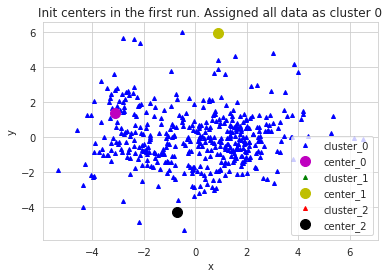

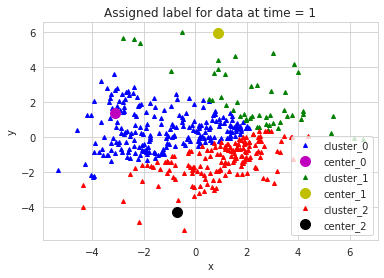

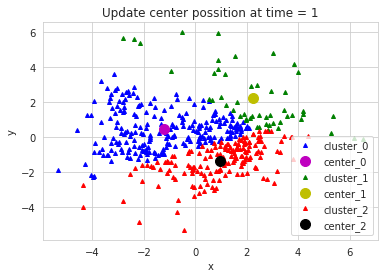

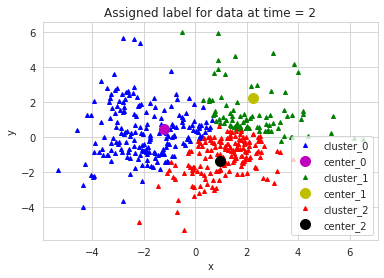

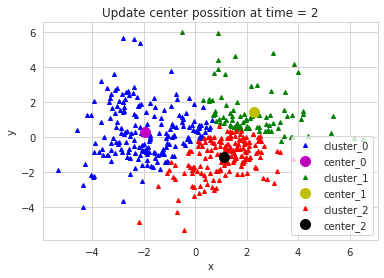

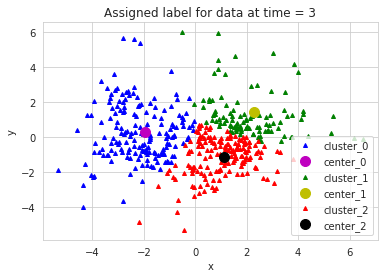

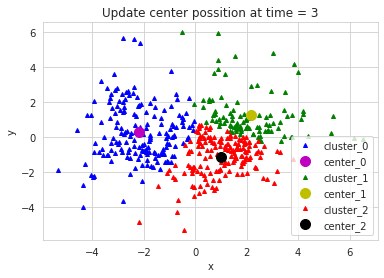

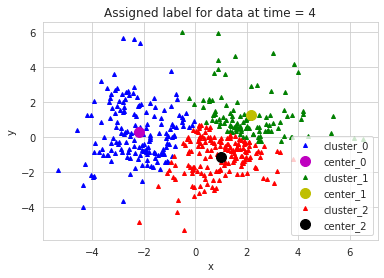

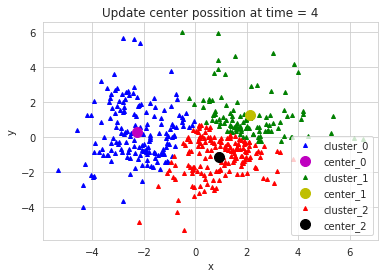

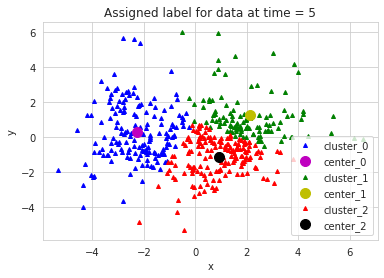

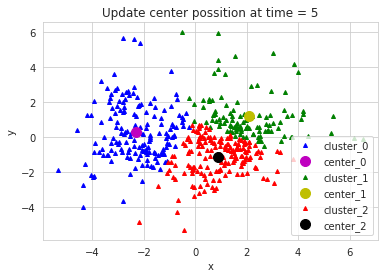

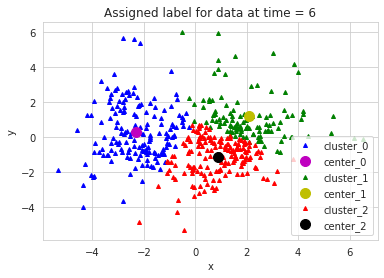

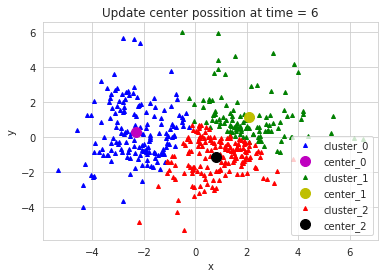

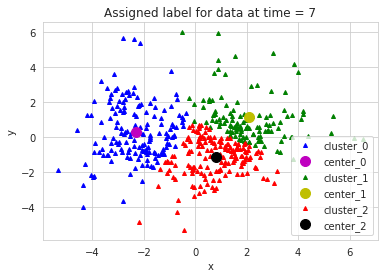

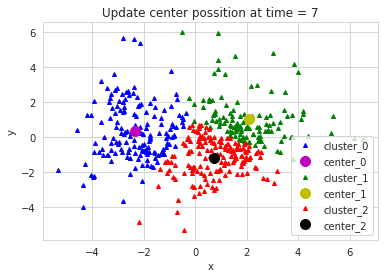

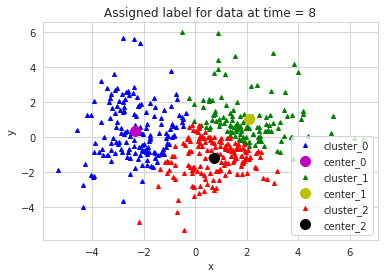

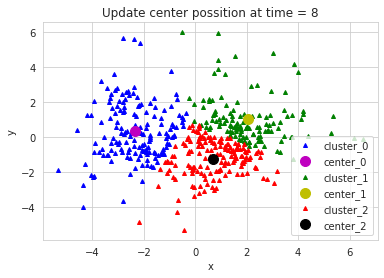

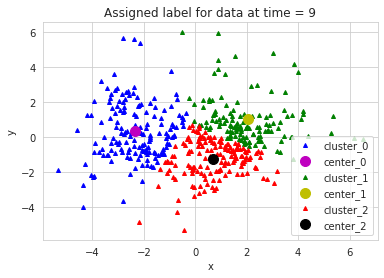

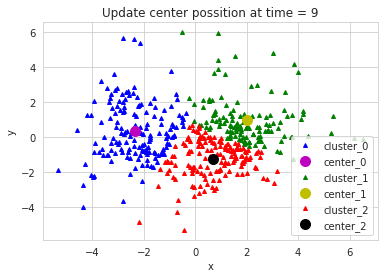

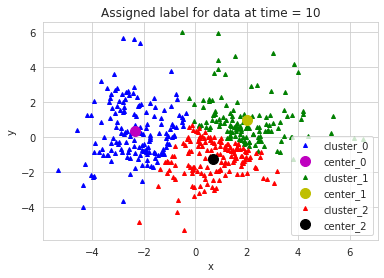

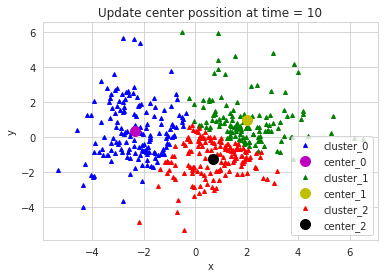

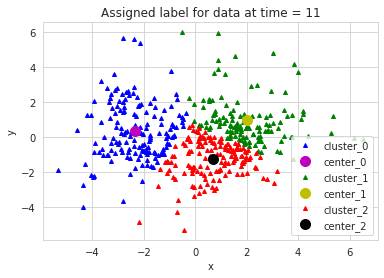

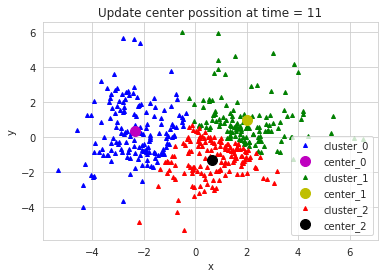

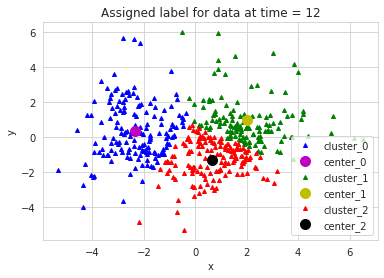

Done! Kmedoids has converged after 11 times


In [34]:
import math 

def dist(A,B):
  sq1 = (A[0]-B[0])*(A[0]-B[0])
  sq2 = (A[1]-B[1])*(A[1]-B[1])
  return math.sqrt(sq1 + sq2)

def kmedoids_center(X):
  index = 0;
  min_sum = 999999999;
  sum = 0;
  for i in range(len(X)):
    for j in range(len(X)):
      sum = sum + dist(X[i],X[j])
    if sum < min_sum:
      min_sum = sum
      index = i
  return X[index]   

def kmedoids_init_centers(X, n_cluster):
  # random k index beetween 0 and shape(X) without duplicate index.
  # Then return X[index] as cluster
  return X[np.random.choice(X.shape[0], n_cluster, replace=False)]

def kmedoids_predict_labels(X, centers):
  D = cdist(X, centers)
  # return index of the closest center
  return np.argmin(D, axis = 1)

def kmedoids_update_centers(X, labels, n_cluster):
  centers = np.zeros((n_cluster, X.shape[1]))
  for k in range(n_cluster):
    # collect all points assigned to the k-th cluster 
    Xk = X[labels == k, :]
    centers[k] = np.mean(Xk, axis = 0)
  return centers

def kmedoids_has_converged(centers, new_centers):
  # return True if two sets of centers are the same
  return (set([tuple(a) for a in centers]) == 
      set([tuple(a) for a in new_centers]))

def kmedoids_visualize(X, centers, labels, n_cluster, title):
  plt.xlabel('x') # label trục x
  plt.ylabel('y') # label trục y
  plt.title(title) # title của đồ thị
  plt_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'] # danh sách các màu hỗ trợ
 
  for i in range(n_cluster):
    data = X[labels == i] # lấy dữ liệu của cụm i
    plt.plot(data[:, 0], data[:, 1], plt_colors[i] + '^', markersize = 4, label = 'cluster_' + str(i)) # Vẽ cụm i lên đồ thị
    plt.plot(centers[i][0], centers[i][1],  plt_colors[i+4] + 'o', markersize = 10, label = 'center_' + str(i)) # Vẽ tâm cụm i lên đồ thị
  plt.legend() # Hiện bảng chú thích
  plt.show()

def kmedoids(init_centes, init_labels, X, n_cluster):
  centers = init_centes
  labels = init_labels
  times = 0
  while True:
    labels = kmedoids_predict_labels(X, centers)
    kmedoids_visualize(X, centers, labels, n_cluster, 'Assigned label for data at time = ' + str(times + 1))
    new_centers = kmedoids_update_centers(X, labels, n_cluster)
    if kmedoids_has_converged(centers, new_centers):
      break
    centers = new_centers
    kmedoids_visualize(X, centers, labels, n_cluster, 'Update center possition at time = ' + str(times + 1))
    times += 1
  return (centers, labels, times)

init_centers = kmedoids_init_centers(arr, n_cluster)
print(init_centers) # In ra tọa độ khởi tạo ban đầu của các tâm cụm
init_labels = np.zeros(arr.shape[0])
kmedoids_visualize(arr, init_centers, init_labels, n_cluster, 'Init centers in the first run. Assigned all data as cluster 0')
centers, labels, times = kmedoids(init_centers, init_labels, arr, n_cluster)
 
print('Done! Kmedoids has converged after', times, 'times')

## 5.3) Hierarchical Clustering
---
ierarchical clustering is a type of unsupervised machine learning algorithm used to cluster unlabeled data points. Like K-means clustering, hierarchical clustering also groups together the data points with similar characteristics. In some cases the result of hierarchical and K-Means clustering can be similar. Before implementing hierarchical clustering using Scikit-Learn, let's first understand the theory behind hierarchical clustering.

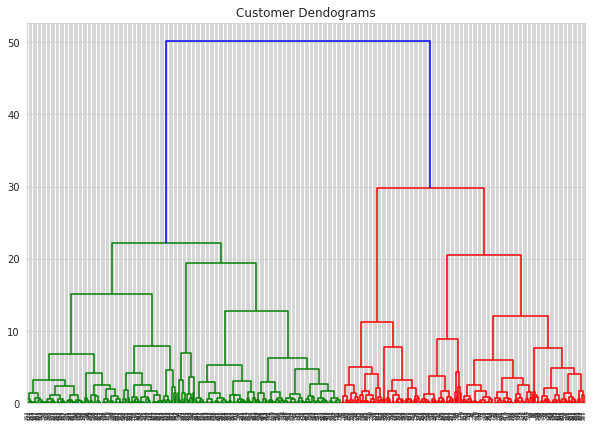

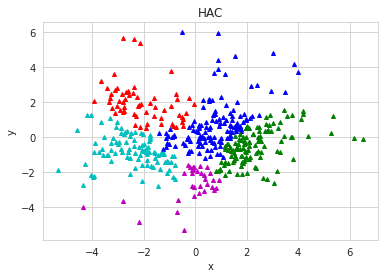

In [35]:

import pandas as pd
%matplotlib inline
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

data = reduced_data
arr2 = data.to_numpy()

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
labels = cluster.fit_predict(data)
plt.show()
plt.clf()
plt.xlabel('x') 
plt.ylabel('y') 
plt.title('HAC') 
plt_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
 
for i in range(5):
  for j in range(len(labels)):
    if labels[j] == i:
      plt.plot(arr2[j][0],arr2[j][1], plt_colors[i] + '^', markersize = 4, label = 'cluster_' + str(i)) 
plt.show()


## 5.4) Attraction Based Clustering

## 5.4.1) Example

,Thuộc tính 1,thuộc tính 2
0,3.5,3.0
1,1.0,2.0
2,3.0,4.0
3,4.0,2.0
4,2.0,7.0
5,3.0,3.0
6,4.0,8.0
7,1.0,3.0
8,1.0,4.0
9,1.5,3.0


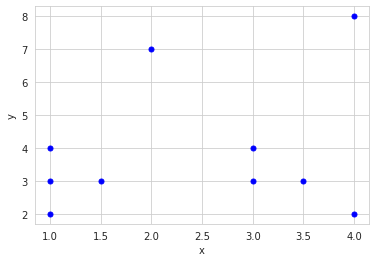

In [36]:
#Minh họa thuật toán
m = 10
n = 2
example = np.array([(3.5,3), (1,2), (3,4), (4,2), (2,7), (3,3), (4,8), (1,3), (1,4), (1.5,3)], dtype = float)
w = np.ones((m, 1))
w[0] = 3
w[7] = 3
display(pd.DataFrame(example, columns = ['Thuộc tính 1', 'thuộc tính 2']))

plt.xlabel('x')
plt.ylabel('y')
plt.plot(example[:, 0], example[:, 1], 'bo', markersize=5)
plt.plot()
plt.show()

In [37]:
from scipy.spatial import distance

#Hàm tính khoảng cách Euclide
def dist_euclide(A,B,n): #n là số chiều chữ liệu.
  sum = 0;
  for i in range(n):
    sum = sum + (A[i] - B[i]) * (A[i] - B[i])
  return math.sqrt(sum)

#Hàm tính ma trận khoảng cách
def dist_matrix(X, m, n): #m là số phần tử, X là tập hợp dữ liệu, n là số chiều
  matrix = np.zeros((m,m)) # Ma trận khoảng cách 
  for i in range(m):
    for j in range(m):
      matrix[i][j] = dist_euclide(X[i],X[j],n)
  return matrix;

distance = dist_matrix(example, m, n)
display(pd.DataFrame(np.round(distance, 4)))
Th = 0.05 * np.max(distance)
print("Giá trị ngưỡng: ",Th)

,0,1,2,3,4,5,6,7,8,9
0,0.0000,2.6926,1.1180,1.1180,4.2720,0.5000,5.0249,2.5000,2.6926,2.0000
1,2.6926,0.0000,2.8284,3.0000,5.0990,2.2361,6.7082,1.0000,2.0000,1.1180
2,1.1180,2.8284,0.0000,2.2361,3.1623,1.0000,4.1231,2.2361,2.0000,1.8028
3,1.1180,3.0000,2.2361,0.0000,5.3852,1.4142,6.0000,3.1623,3.6056,2.6926
4,4.2720,5.0990,3.1623,5.3852,0.0000,4.1231,2.2361,4.1231,3.1623,4.0311
5,0.5000,2.2361,1.0000,1.4142,4.1231,0.0000,5.0990,2.0000,2.2361,1.5000
6,5.0249,6.7082,4.1231,6.0000,2.2361,5.0990,0.0000,5.8310,5.0000,5.5902
7,2.5000,1.0000,2.2361,3.1623,4.1231,2.0000,5.8310,0.0000,1.0000,0.5000
8,2.6926,2.0000,2.0000,3.6056,3.1623,2.2361,5.0000,1.0000,0.0000,1.1180
9,2.0000,1.1180,1.8028,2.6926,4.0311,1.5000,5.5902,0.5000,1.1180,0.0000


Giá trị ngưỡng:  0.3354101966249685


In [38]:
def force_matrix(dist_matrix,w,m):
# w là mảng khối lượng, m là số phần tử
  A = np.zeros((m,m))
  for i in range(m):
    for j in range(m):
      if dist_matrix[i][j] > Th: # Nếu 2 phần tử được xem là tương đồng thì lực hấp dẫn bằng 0
        A[i][j] = w[i] / (dist_matrix[i][j] * dist_matrix[i][j])
      else:
        A[i][j] = 0
  return A
  
A_matrix = force_matrix(distance, w, m)
display(pd.DataFrame(np.round(A_matrix, 4)))

,0,1,2,3,4,5,6,7,8,9
0,0.0000,0.4138,2.4000,2.4000,0.1644,12.0000,0.1188,0.4800,0.4138,0.7500
1,0.1379,0.0000,0.1250,0.1111,0.0385,0.2000,0.0222,1.0000,0.2500,0.8000
2,0.8000,0.1250,0.0000,0.2000,0.1000,1.0000,0.0588,0.2000,0.2500,0.3077
3,0.8000,0.1111,0.2000,0.0000,0.0345,0.5000,0.0278,0.1000,0.0769,0.1379
4,0.0548,0.0385,0.1000,0.0345,0.0000,0.0588,0.2000,0.0588,0.1000,0.0615
5,4.0000,0.2000,1.0000,0.5000,0.0588,0.0000,0.0385,0.2500,0.2000,0.4444
6,0.0396,0.0222,0.0588,0.0278,0.2000,0.0385,0.0000,0.0294,0.0400,0.0320
7,0.4800,3.0000,0.6000,0.3000,0.1765,0.7500,0.0882,0.0000,3.0000,12.0000
8,0.1379,0.2500,0.2500,0.0769,0.1000,0.2000,0.0400,1.0000,0.0000,0.8000
9,0.2500,0.8000,0.3077,0.1379,0.0615,0.4444,0.0320,4.0000,0.8000,0.0000


In [39]:
def Max_dif(A,B,n):
  max = 0
  for i in range(n):
    if max < abs(A[i] - B[i]):
      max = abs(A[i] - B[i])
  return max

def vector(A,B,force,n):
  v = np.zeros(n)
  md = Max_dif(A,B,n)
  for i in range(n):
    v[i] = ((A[i] - B[i])/md) * force 
  return v

def moving_vector(X,m,n,A):
  global w
  mv = np.zeros((m,n))
  for i in range(m):
    for j in range(m):
      if i != j:
        v = vector(X[j],X[i],A[j][i],n)
      else:
        v = np.zeros(n)
      for k in range(n):
        mv[i][k] =  (mv[i][k] + v[k]) / w[i]
  return mv

def scale(mv, m, n, Th):
  max = 0
  x = 0
  for i in range(m):
    x = 0
    for j in range(n):
      x = x + mv[i][j]*mv[i][j]
    x = math.sqrt(x)
    if max < x:
      max = x
  scale = Th/max
  return scale

def fixed_mv(mv, m, n, s):
  fixed_mv = np.zeros((m,n))
  for i in range(m):
    for j in range(n):
      fixed_mv[i][j] = mv[i][j] * s
  return fixed_mv

mv = moving_vector(example,m,n,A_matrix)
print('Các vector dịch chuyển: \n')
display(pd.DataFrame(np.round(mv, 4)))
s = scale(mv,m,n,Th)
print('Scale: ', s)
print('Các vector dịch chuyển sau khi biến đổi: \n')
mv = fixed_mv(mv,m, n, s)
display(pd.DataFrame(np.round(mv, 4)))
 

Các vector dịch chuyển: 



,0,1
0,-0.1328,0.0064
1,1.2687,4.5012
2,-0.0013,-4.0713
3,-2.4398,3.3687
4,0.2306,-0.6342
5,10.8985,0.5973
6,-0.3443,-0.5263
7,1.3347,0.1115
8,1.4040,-4.2268
9,-11.1362,0.2435


Scale:  0.03011160425815145
Các vector dịch chuyển sau khi biến đổi: 



,0,1
0,-0.0040,0.0002
1,0.0382,0.1355
2,-0.0000,-0.1226
3,-0.0735,0.1014
4,0.0069,-0.0191
5,0.3282,0.0180
6,-0.0104,-0.0158
7,0.0402,0.0034
8,0.0423,-0.1273
9,-0.3353,0.0073


,Thuộc tính 1,thuộc tính 2
0,3.496002,3.000194
1,1.038203,2.135538
2,2.999960,3.877406
3,3.926535,2.101437
4,2.006945,6.980904
5,3.328173,3.017985
6,3.989632,7.984151
7,1.040189,3.003358
8,1.042278,3.872724
9,1.164670,3.007332


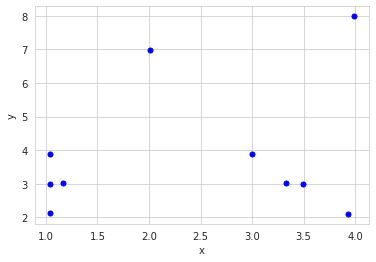

In [40]:


def moving(A, mv, m, n):
  global w
  B = np.zeros((m,n))
  for i in range(m):
    for j in range(n):
      B[i][j] = A[i][j] + mv[i][j]
  return B

B = moving(example, mv, m, n)

display(pd.DataFrame(B, columns = ['Thuộc tính 1', 'thuộc tính 2']))

plt.xlabel('x')
plt.ylabel('y')
plt.plot(B[:, 0], B[:, 1], 'bo', markersize=5)
plt.plot()
plt.show()
  

In [41]:
#Phân cụm
arr = B
label = np.zeros((m,1)) # dãn nhán cho các phần tử (0 là chưa phân cụm)
checked = np.zeros((m,1))
k = 0

def all_checked(arr, m):
  for i in range(m):
    if arr[i] == 0:
      return 0
  return 1

def mindist(A,arr,m,n):
  global checked
  min = 9999
  index = -1
  for i in range(m):
    if checked[i] == 0:
      if dist_euclide(A, arr[i], n) != 0 and dist_euclide(A, arr[i], n) < min:
        min = dist_euclide(A, arr[i], n)
        index = i
  return index

def findcluster(i): 
  global checked
  global label
  global k
  global Th
  index = mindist(arr[i], arr, m, n)
  if index != -1 and dist_euclide(arr[i], arr[index], n)  < Th:
    label[i] = k
    label[index] = k
    checked[i] = 1
    checked[index] = 1
    findcluster(index)
    findcluster(i)
  else:
    checked[i] = 1
      
for i in range(m):
  if checked[i] == 0:
    index = mindist(arr[i], arr, m, n)
    if index != -1 and dist_euclide(arr[i], arr[index], n)  < Th:
      k = k + 1
      findcluster(i)

display(pd.DataFrame(np.append(B, label, 1), columns = ['Thuộc tính 1', 'thuộc tính 2', 'Cụm']))

,Thuộc tính 1,thuộc tính 2,Cụm
0,3.496002,3.000194,1.0
1,1.038203,2.135538,0.0
2,2.999960,3.877406,0.0
3,3.926535,2.101437,0.0
4,2.006945,6.980904,0.0
5,3.328173,3.017985,1.0
6,3.989632,7.984151,0.0
7,1.040189,3.003358,2.0
8,1.042278,3.872724,0.0
9,1.164670,3.007332,2.0


In [42]:
#Điều kiện dừng
def check_condition(arr,m):
  count = 0;
  for i in range(m):
    if arr[i] == 0:
      count = count + 1
  return count / m


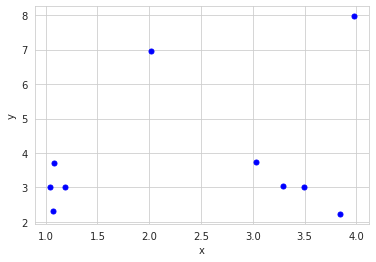

,Thuộc tính 1,thuộc tính 2,Cụm
0,3.496002,3.000194,1.0
1,1.038203,2.135538,0.0
2,2.999960,3.877406,0.0
3,3.926535,2.101437,0.0
4,2.006945,6.980904,0.0
5,3.328173,3.017985,1.0
6,3.989632,7.984151,0.0
7,1.040189,3.003358,2.0
8,1.042278,3.872724,0.0
9,1.164670,3.007332,2.0


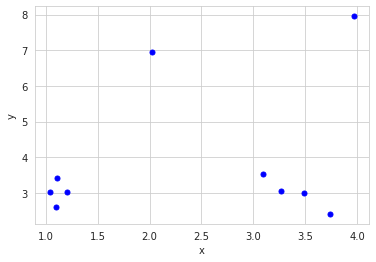

,Thuộc tính 1,thuộc tính 2,Cụm
0,3.496002,3.000194,1.0
1,1.038203,2.135538,0.0
2,2.999960,3.877406,0.0
3,3.926535,2.101437,0.0
4,2.006945,6.980904,0.0
5,3.328173,3.017985,1.0
6,3.989632,7.984151,0.0
7,1.040189,3.003358,2.0
8,1.042278,3.872724,0.0
9,1.164670,3.007332,2.0


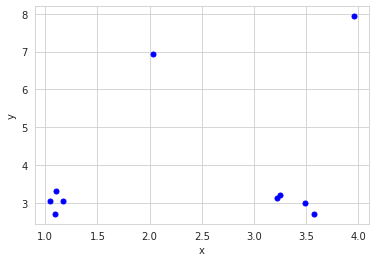

,Thuộc tính 1,thuộc tính 2,Cụm
0,3.496002,3.000194,1.0
1,1.038203,2.135538,2.0
2,2.999960,3.877406,1.0
3,3.926535,2.101437,1.0
4,2.006945,6.980904,0.0
5,3.328173,3.017985,1.0
6,3.989632,7.984151,0.0
7,1.040189,3.003358,2.0
8,1.042278,3.872724,2.0
9,1.164670,3.007332,2.0


In [43]:
#Mô phỏng bài toàn hoàn chỉnh

while check_condition(label,m) > 0.2:
  distance = dist_matrix(arr, m, n)
  A_matrix = force_matrix(distance, w, m)
  mv = moving_vector(arr,m,n,A_matrix)
  mv = fixed_mv(mv,m, n, s)
  arr = moving(arr, mv, m, n)

  plt.xlabel('x')
  plt.ylabel('y')
  plt.plot(arr[:, 0], arr[:, 1], 'bo', markersize=5)
  plt.plot()
  plt.show()

  label = np.zeros((m,1)) 
  checked = np.zeros((m,1))
  k = 0

  for i in range(m):
    if checked[i] == 0:
      index = mindist(arr[i], arr, m, n)
      if index != -1 and dist_euclide(arr[i], arr[index], n)  < Th:
        k = k + 1
        findcluster(i)
  
  display(pd.DataFrame(np.append(B, label, 1), columns = ['Thuộc tính 1', 'thuộc tính 2', 'Cụm']))



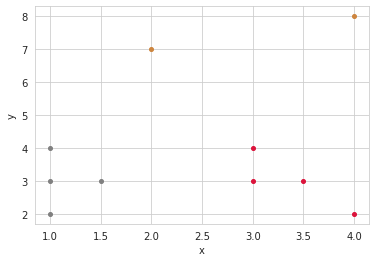

In [44]:
def ABC_visualize(X, labels, n_cluster, m):
  plt.xlabel('x') # label trục x
  plt.ylabel('y') # label trục y
  plt_colors = ['peru','crimson','grey','chocolate','gold','lightblue','steelblue','b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'] # danh sách các màu hỗ trợ
  count = 0
  for i in range(n_cluster + 1):
    for j in range(m):
      if labels[j] == i:
        count = count + 1
    data = np.zeros((count,2))
    count = 0
    for j in range(m):
      if labels[j] == i:
        data[count] = X[j]
        count = count + 1
    count = 0
    plt.plot(data[:, 0], data[:, 1], 'go', color = plt_colors[i], markersize = 4) # Vẽ cụm i lên đồ thị
  plt.show()

ABC_visualize(example, label, k , m)

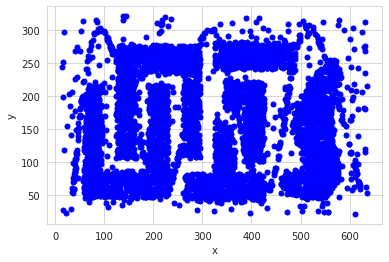

In [57]:
input = np.loadtxt('/content/gdrive/MyDrive/Colab Notebooks/t4.8k.txt', dtype='float', delimiter=' ')

m = 5000
data = np.zeros((m,2))
for i in range(m):
  data[i] = input[i]

plt.xlabel('x')
plt.ylabel('y')
plt.plot(data[:, 0], data[:, 1], 'bo', markersize=5)
plt.plot()
plt.show()

def moving_vector_2(X,m,n,A):
  global w
  mv = np.zeros((m,n))
  count = 0
  for i in range(m):
    for j in range(m):
      if i != j:
        count = 0
        if A[i][j] == 0:
          count = count + 1 # Đếm số lượng liên kết
        v = vector(X[j],X[i],A[j][i],n)
      else:
        v = np.zeros(n)
      for k in range(n):
        mv[i][k] =  (mv[i][k] + v[k]) * pow(0.9,count)
  return mv


In [46]:
def Chameleon_visualize(X, labels, n_cluster, m):
  plt.xlabel('x') # label trục x
  plt.ylabel('y') # label trục y
  plt_colors = ['coral','purple','plum','khaki','teal','lime','peru','crimson','grey','chocolate','gold','lightblue','steelblue','b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'] 
  # danh sách các màu hỗ trợ
  count = 0
  f = 0
  for i in range(n_cluster + 1):
    for j in range(m):
      if labels[j] == i:
        count = count + 1
    if count > 30:
      data = np.zeros((count,2))
      count = 0
      for j in range(m):
        if labels[j] == i:
          data[count] = X[j]
          count = count + 1
      plt.plot(data[:, 0], data[:, 1], 'go', color = plt_colors[f], markersize = 4) # Vẽ cụm i lên đồ thị
      f = f + 1
    else: 
      count = 0
  plt.show()

Vòng lặp thứ  1


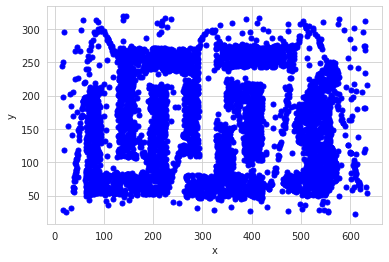


 Vòng lặp thứ  2


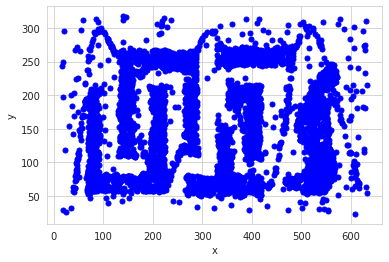

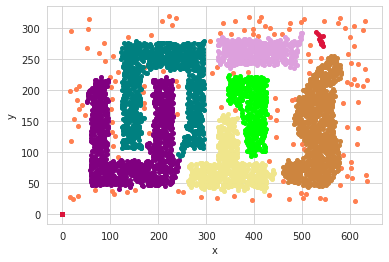

In [59]:
m = 5000 # Số lượng phần tử
n = 2 # Số thuộc tính
w = np.ones((m, 1))
label = np.zeros((m,1)) # dãn nhán cho các phần tử (0 là chưa phân cụm)
checked = np.zeros((m,1))
k = 0

distance = dist_matrix(data, m, n)
Th = 0.01 * np.max(distance) # Giá trị ngưỡng
A_matrix = force_matrix(distance, w, m)
mv = moving_vector_2(data,m,n,A_matrix)
s = scale(mv,m,n,Th)
mv = fixed_mv(mv,m, n, s)
arr = moving(data, mv, m, n)

a = 1
print('Vòng lặp thứ ', a)

plt.xlabel('x')
plt.ylabel('y')
plt.plot(arr[:, 0], arr[:, 1], 'bo', markersize=5)
plt.plot()
plt.show()

while check_condition(label,m) > 0.2: # Điều kiện dừng (tỷ lệ số phần tử còn lại chưa phân cụm)
  distance = dist_matrix(arr, m, n)
  A_matrix = force_matrix(distance, w, m)
  mv = moving_vector_2(arr,m,n,A_matrix)
  s = scale(mv,m,n,Th)
  mv = fixed_mv(mv,m, n, s)
  arr = moving(arr, mv, m, n)

  a = a + 1
  print('\n Vòng lặp thứ ', a)

  #Hiển thị quá trình phân cụm
  plt.xlabel('x')
  plt.ylabel('y')
  plt.plot(arr[:, 0], arr[:, 1], 'bo', markersize=5)
  plt.plot()
  plt.show()

  label = np.zeros((m,1)) 
  checked = np.zeros((m,1))
  k = 0

  for i in range(m):
    if checked[i] == 0:
      index = mindist(arr[i], arr, m, n)
      if index != -1 and dist_euclide(arr[i], arr[index], n) < Th:
        k = k + 1
        findcluster(i)

Chameleon_visualize(data, label, k , m) #Hiển thị kết quả cuối cùng
